# Slovakia EDA

# Predicting the number of active cases in Slovakia.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Reading CSV File
df=pd.read_csv(r'C:\Users\DELL\Downloads\linear-comprehensive-covid-data.csv')

#pandas- allows easy manipulation of data structures
#NumPy- allows scientific computing
#sklearn- A machine learning library for python
#Matplotlib -is a library for creating static, animated, and interactive visualizations in Python.
#Seaborn -is a data visualization library in Python based on matplotlib.
#NumPy- allows scientific computing

In [80]:
#Basic Data Analysis

In [81]:
df.head()
#basic data analysis,quick view of data set
#showes first five rows of the data set

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [82]:
df.shape

(74866, 59)

In [83]:
df.info()
#Summary of data frame, including the index datatype and column dtypes, non-null values and memory usage
#This method prints information about a DataFrame including the index dtype and column dtypes,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74866 non-null  object 
 1   continent                              71169 non-null  object 
 2   location                               74866 non-null  object 
 3   date                                   74866 non-null  object 
 4   total_cases                            73719 non-null  float64
 5   new_cases                              73717 non-null  float64
 6   new_cases_smoothed                     72716 non-null  float64
 7   total_deaths                           64490 non-null  float64
 8   new_deaths                             64648 non-null  float64
 9   new_deaths_smoothed                    72716 non-null  float64
 10  total_cases_per_million                73317 non-null  float64
 11  ne

# Slovakia - EDA

Exploratory data analysis for the country Slovakia. From covid 19 world dataset (df)Select data where location=Slovakia

In [84]:
df_slovakia=df[(df['location']=='Slovakia')]

In [85]:
print("The shape of the data frame is", (df_slovakia.shape))
print("The columns of the data frame are" , (df_slovakia.columns))

The shape of the data frame is (374, 59)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vac

In [86]:
df_slovakia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60393,SVK,Europe,Slovakia,06-03-2020,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60394,SVK,Europe,Slovakia,07-03-2020,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60395,SVK,Europe,Slovakia,08-03-2020,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60396,SVK,Europe,Slovakia,09-03-2020,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60397,SVK,Europe,Slovakia,10-03-2020,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [87]:
#sort Slovakia data set (sort() method sorts the list ascending by default)
df_slovakia=df_slovakia.reindex(sorted(df_slovakia.columns), axis=1)
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   aged_65_older                          374 non-null    float64
 1   aged_70_older                          374 non-null    float64
 2   cardiovasc_death_rate                  374 non-null    float64
 3   continent                              374 non-null    object 
 4   date                                   374 non-null    object 
 5   diabetes_prevalence                    374 non-null    float64
 6   extreme_poverty                        374 non-null    float64
 7   female_smokers                         374 non-null    float64
 8   gdp_per_capita                         374 non-null    float64
 9   handwashing_facilities                 0 non-null      float64
 10  hosp_patients                          312 non-null    float64
 11  

# Number of missing values per column.

In [88]:
# number of missing value per column
df_slovakia.isnull().sum()

aged_65_older                              0
aged_70_older                              0
cardiovasc_death_rate                      0
continent                                  0
date                                       0
diabetes_prevalence                        0
extreme_poverty                            0
female_smokers                             0
gdp_per_capita                             0
handwashing_facilities                   374
hosp_patients                             62
hosp_patients_per_million                 62
hospital_beds_per_thousand                 0
human_development_index                    0
icu_patients                             374
icu_patients_per_million                 374
iso_code                                   0
life_expectancy                            0
location                                   0
male_smokers                               0
median_age                                 0
new_cases                                  0
new_cases_

# Remove unnecessary columns,columns having lot of missing values,and columns having duplicate name

In [89]:
df_slovakia.drop(['handwashing_facilities','icu_patients','icu_patients_per_million','new_vaccinations','new_vaccinations_smoothed',
                  'location','iso_code','continent','location','new_vaccinations_smoothed_per_million','people_fully_vaccinated','people_fully_vaccinated_per_hundred',
                    'people_vaccinated','people_vaccinated_per_hundred','weekly_icu_admissions_per_million','weekly_icu_admissions','weekly_hosp_admissions_per_million',
                  'weekly_hosp_admissions','total_vaccinations','total_vaccinations_per_hundred','continent','iso_code'],axis=1, inplace=True)

In [90]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aged_65_older                    374 non-null    float64
 1   aged_70_older                    374 non-null    float64
 2   cardiovasc_death_rate            374 non-null    float64
 3   date                             374 non-null    object 
 4   diabetes_prevalence              374 non-null    float64
 5   extreme_poverty                  374 non-null    float64
 6   female_smokers                   374 non-null    float64
 7   gdp_per_capita                   374 non-null    float64
 8   hosp_patients                    312 non-null    float64
 9   hosp_patients_per_million        312 non-null    float64
 10  hospital_beds_per_thousand       374 non-null    float64
 11  human_development_index          374 non-null    float64
 12  life_expectancy 

In [91]:
#converting string date to date-time
df_slovakia['date'] = pd.to_datetime(df_slovakia['date']) 
df_slovakia.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,date,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,hosp_patients,hosp_patients_per_million,...,reproduction_rate,stringency_index,tests_per_case,tests_units,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand
60393,15.07,9.167,287.959,2020-06-03,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,16.67,NaN,tests performed,1.0,0.183,NaN,NaN,378.0,0.069
60394,15.07,9.167,287.959,2020-07-03,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,16.67,NaN,tests performed,1.0,0.183,NaN,NaN,444.0,0.081
60395,15.07,9.167,287.959,2020-08-03,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,16.67,NaN,tests performed,3.0,0.549,NaN,NaN,520.0,0.095
60396,15.07,9.167,287.959,2020-09-03,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,22.22,NaN,tests performed,3.0,0.549,NaN,NaN,589.0,0.108
60397,15.07,9.167,287.959,2020-10-03,7.29,0.7,23.1,30155.152,NaN,NaN,...,NaN,33.33,NaN,tests performed,7.0,1.282,NaN,NaN,700.0,0.128


In [92]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   aged_65_older                    374 non-null    float64       
 1   aged_70_older                    374 non-null    float64       
 2   cardiovasc_death_rate            374 non-null    float64       
 3   date                             374 non-null    datetime64[ns]
 4   diabetes_prevalence              374 non-null    float64       
 5   extreme_poverty                  374 non-null    float64       
 6   female_smokers                   374 non-null    float64       
 7   gdp_per_capita                   374 non-null    float64       
 8   hosp_patients                    312 non-null    float64       
 9   hosp_patients_per_million        312 non-null    float64       
 10  hospital_beds_per_thousand       374 non-null    float64

# change object data type to numeric data type

In [93]:
#convertstring date to date-time
#date-time fromat to numeric

In [94]:
#converting string date to date-time
df_slovakia['date'] = pd.to_datetime(df_slovakia['date']) 


In [95]:
#date-time fromat to numeric dqta type
df_slovakia['date'] = pd.to_numeric(df_slovakia['date'])

change "test_units"object to numeric data type

In [96]:
df_slovakia["tests_units"].value_counts()

tests performed    373
Name: tests_units, dtype: int64

In [97]:
# Convert categorical variable  tests_units into dummy(one hot encoding)
test_performed=pd.get_dummies(df_slovakia['tests_units'])

In [98]:
## add "test_performed" to df_slovakia data frame
df_slovakia = pd.concat([df_slovakia,test_performed], axis=1)

In [99]:
#drop "tests_units"
df_slovakia.drop(['tests_units'],axis=1,inplace=True)

In [100]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aged_65_older                    374 non-null    float64
 1   aged_70_older                    374 non-null    float64
 2   cardiovasc_death_rate            374 non-null    float64
 3   date                             374 non-null    int64  
 4   diabetes_prevalence              374 non-null    float64
 5   extreme_poverty                  374 non-null    float64
 6   female_smokers                   374 non-null    float64
 7   gdp_per_capita                   374 non-null    float64
 8   hosp_patients                    312 non-null    float64
 9   hosp_patients_per_million        312 non-null    float64
 10  hospital_beds_per_thousand       374 non-null    float64
 11  human_development_index          374 non-null    float64
 12  life_expectancy 

# Data Analysis

# Univariate analysis and Imputation

In [101]:
print(df_slovakia.isnull().values.sum())

309


In [102]:
df_slovakia.isnull().sum()

aged_65_older                       0
aged_70_older                       0
cardiovasc_death_rate               0
date                                0
diabetes_prevalence                 0
extreme_poverty                     0
female_smokers                      0
gdp_per_capita                      0
hosp_patients                      62
hosp_patients_per_million          62
hospital_beds_per_thousand          0
human_development_index             0
life_expectancy                     0
male_smokers                        0
median_age                          0
new_cases                           0
new_cases_per_million               0
new_cases_smoothed                  5
new_cases_smoothed_per_million      5
new_deaths                         26
new_deaths_per_million             26
new_deaths_smoothed                 5
new_deaths_smoothed_per_million     5
new_tests                           1
new_tests_per_thousand              1
new_tests_smoothed                  8
new_tests_sm

Text(0.5, 1.0, 'Histogram of hosp_patients_per_million')

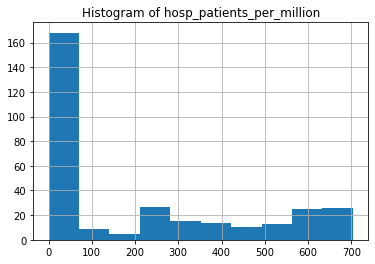

In [103]:
#hosp_patients_per_million
df_slovakia.hosp_patients_per_million.hist()
plt.plot()
plt.title('Histogram of hosp_patients_per_million')

graph data is not normally distributed and it is right skewed, repalce missing value of "hosp_patients" with median value

In [104]:
#repalce missing value of " hosp_patients" with median value,
df_slovakia["hosp_patients"].fillna(df_slovakia["hosp_patients"].median(), inplace = True)
df_slovakia["hosp_patients_per_million"].fillna(df_slovakia["hosp_patients_per_million"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_cases_smoothed')

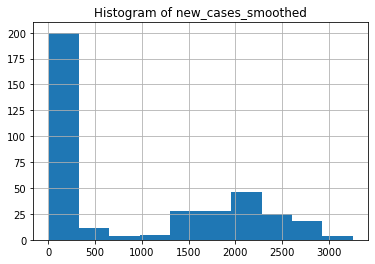

In [105]:
#new_cases_smoothed
df_slovakia.new_cases_smoothed.hist()
plt.plot()
plt.title('Histogram of new_cases_smoothed')

graph data is not normally distributed and it is right skewed, repalce missing value of "new_cases_smoothed" with median value

In [106]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_cases_smoothed_per_million"].fillna(df_slovakia["new_cases_smoothed_per_million"].median(), inplace = True)
df_slovakia["new_cases_smoothed"].fillna(df_slovakia["new_cases_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_deaths')

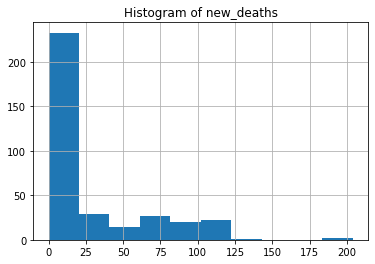

In [107]:
#new_deaths_per_million
df_slovakia.new_deaths.hist()
plt.plot()
plt.title('Histogram of new_deaths')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [108]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_deaths_per_million"].fillna(df_slovakia["new_deaths_per_million"].median(), inplace = True)
df_slovakia["new_deaths"].fillna(df_slovakia["new_deaths"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_deaths_smoothed_per_million')

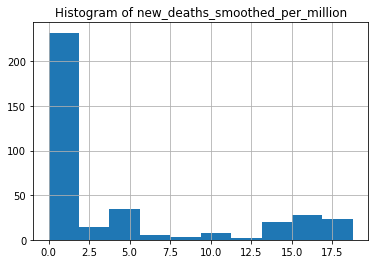

In [109]:
#new_deaths_per_million
df_slovakia.new_deaths_smoothed_per_million.hist()
plt.plot()
plt.title('Histogram of new_deaths_smoothed_per_million')

graph data is not normally distributed and it is right skewed, repalce missing value  median value

In [110]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_deaths_smoothed_per_million"].fillna(df_slovakia["new_deaths_smoothed_per_million"].median(), inplace = True)
df_slovakia["new_deaths_smoothed"].fillna(df_slovakia["new_deaths_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_tests')

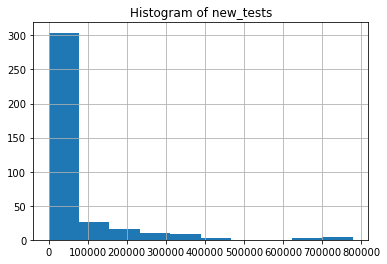

In [111]:
#new_deaths_per_million
df_slovakia.new_tests.hist()
plt.plot()
plt.title('Histogram of new_tests')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [112]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_tests_per_thousand"].fillna(df_slovakia["new_tests_per_thousand"].median(), inplace = True)
df_slovakia["new_tests"].fillna(df_slovakia["new_tests"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of new_tests_smoothed_per_thousand')

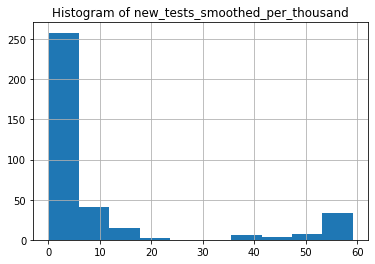

In [113]:
#new_tests_smoothed_per_thousand
df_slovakia.new_tests_smoothed_per_thousand.hist()
plt.plot()
plt.title('Histogram of new_tests_smoothed_per_thousand')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [114]:
#repalce missing value of "new_cases_smoothed_per_million" with median value,
df_slovakia["new_tests_smoothed_per_thousand"].fillna(df_slovakia["new_tests_smoothed_per_thousand"].median(), inplace = True)
df_slovakia["new_tests_smoothed"].fillna(df_slovakia["new_tests_smoothed"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of positive_rate')

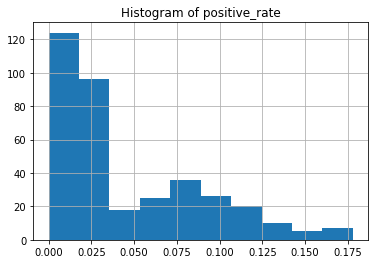

In [115]:
#positive_rate
df_slovakia.positive_rate.hist()
plt.plot()
plt.title('Histogram of positive_rate')

graph data is not normally distributed and it is right skewed, repalce missing value with median value

In [116]:
df_slovakia["positive_rate"].fillna(df_slovakia["positive_rate"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of reproduction_rate')

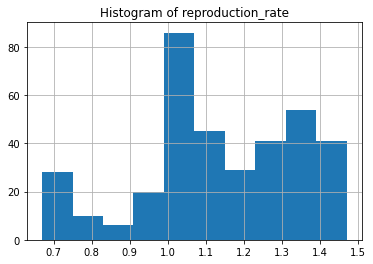

In [117]:
#reproduction_rate
df_slovakia.reproduction_rate.hist()
plt.plot()
plt.title('Histogram of reproduction_rate')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [118]:
df_slovakia["reproduction_rate"].fillna(df_slovakia["reproduction_rate"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of stringency_index')

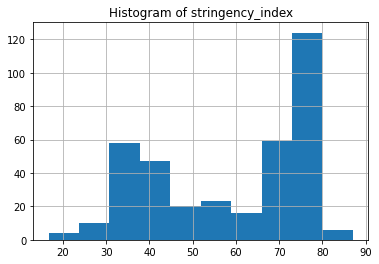

In [119]:
#stringency_index
df_slovakia.stringency_index.hist()
plt.plot()
plt.title('Histogram of stringency_index')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [120]:
df_slovakia["stringency_index"].fillna(df_slovakia["stringency_index"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of tests_per_case')

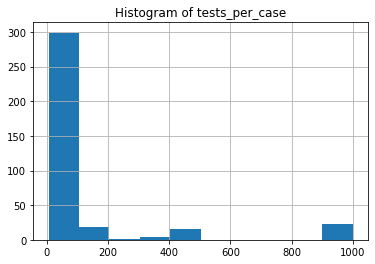

In [121]:
#stringency_index
df_slovakia.tests_per_case.hist()
plt.plot()
plt.title('Histogram of tests_per_case')

In [122]:
df_slovakia["tests_per_case"].fillna(df_slovakia["tests_per_case"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram of total_deaths')

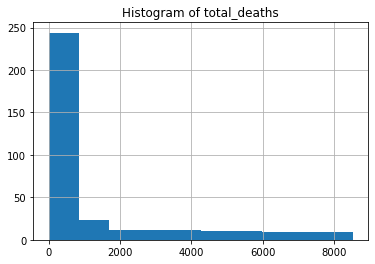

In [123]:
#total_deaths_per_million
df_slovakia.total_deaths.hist()
plt.plot()
plt.title('Histogram of total_deaths')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [124]:
df_slovakia["total_deaths"].fillna(df_slovakia["total_deaths"].median(), inplace = True)
df_slovakia["total_deaths_per_million"].fillna(df_slovakia["total_deaths_per_million"].median(), inplace = True)


Text(0.5, 1.0, 'Histogram of total_tests_per_thousand')

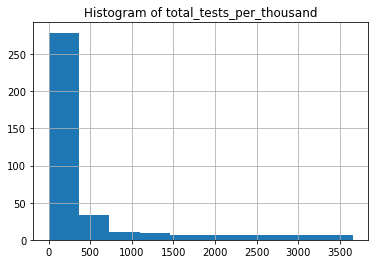

In [125]:
#total_tests_per_thousand
df_slovakia.total_tests_per_thousand.hist()
plt.plot()
plt.title('Histogram of total_tests_per_thousand')

graph data is not normally distributed and it is left skewed, repalce missing value with median value

In [126]:
df_slovakia["total_tests_per_thousand"].fillna(df_slovakia["total_tests_per_thousand"].median(), inplace = True)
df_slovakia["total_tests"].fillna(df_slovakia["total_tests"].median(), inplace = True)

In [127]:
print(df_slovakia.isnull().values.sum())

0


In [128]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#no of population
N=df_slovakia["population"].mean()
#reproduction rate=beta

#expected amount of people  an infected person infect perday(transmission rate constant)
beta=df_slovakia['reproduction_rate'].mean()
#removal rate
D= 14
gamma= 1/D
#D= no of days an infected person has and can spread the disease(like 14-21days)

In [130]:
def deriv(x, t,beta, gamma):
    s,i,r=x
    dsdt=-(beta * s * i)/N
    didt=(beta *s *i)/N - gamma * i
    drdt=gamma * i
    return [dsdt,didt,drdt]

In [131]:
s0=N - i0 -r0
i0=1
r0=0


In [132]:
from scipy.integrate import odeint

In [133]:
t=np.linspace(0,200,200)
x0=s0,i0,r0

In [134]:
soln = odeint(deriv, x0, t, args=(beta,gamma))
s,i,r=soln.T

Text(0, 0.5, 'fraction')

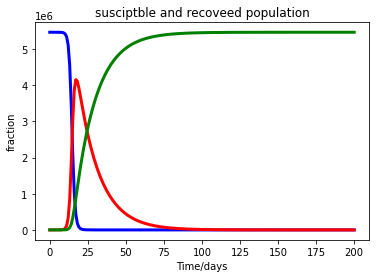

In [135]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(t, s, 'b' ,lw=3, label='Fraction susceptible')
ax.plot(t, i, 'r' ,lw=3, label='Fraction infected')
ax.plot(t, r, 'g' ,lw=3, label='Recovered')
ax.set_title('Susciptble and Recoveed Population')
ax.set_xlabel('Time/days')
ax.set_ylabel('Fraction')


In [136]:
#formulate differential equation


# Bivariate analysis

Bivariate analysis and Features selection

Text(0.5, 1.0, 'hosp_patients vs hosp_patients_per_million')

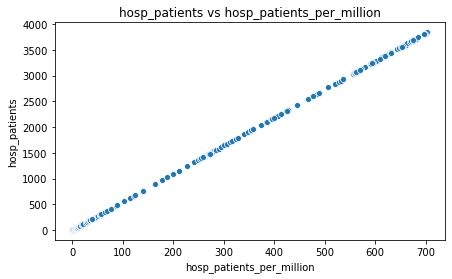

In [137]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['hosp_patients_per_million'], y=df_slovakia["hosp_patients"])
plt.title('hosp_patients vs hosp_patients_per_million')

select one feature for model development,they are identical

Text(0.5, 1.0, 'new_cases vs new_cases_per_million')

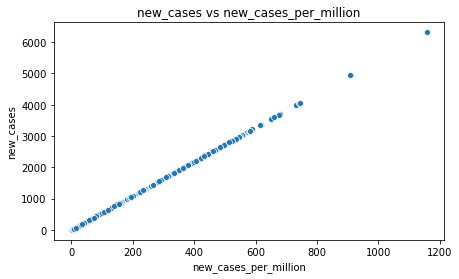

In [138]:
#new_cases_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_cases_per_million'], y=df_slovakia["new_cases"])
plt.title('new_cases vs new_cases_per_million')

select one feature for model development,they are identical

Text(0.5, 1.0, 'new_cases_smoothed vs new_cases_smoothed_per_million')

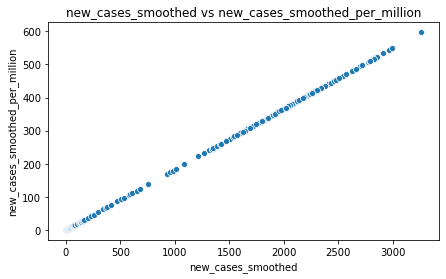

In [139]:
#new_cases_smoothed                  
#new_cases_smoothed_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_cases_smoothed'], y=df_slovakia["new_cases_smoothed_per_million"])
plt.title('new_cases_smoothed vs new_cases_smoothed_per_million')

take one feature to predict the model,drop other

Text(0.5, 1.0, 'total_tests_per_thousand vs total_tests')

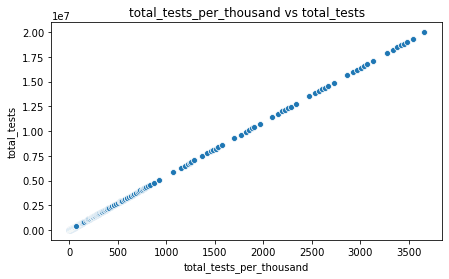

In [140]:
#total_tests                         1
#total_tests_per_thousand
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_tests_per_thousand'], y=df_slovakia["total_tests"])
plt.title('total_tests_per_thousand vs total_tests')

Text(0.5, 1.0, 'total_deaths_per_million vs total_deaths')

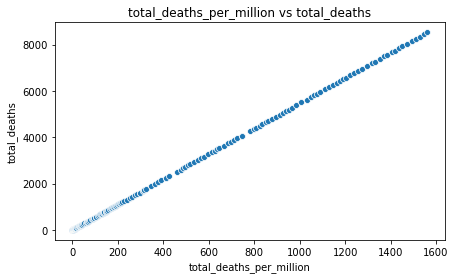

In [141]:
#total_deaths                       
#total_deaths_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_deaths_per_million'], y=df_slovakia["total_deaths"])
plt.title('total_deaths_per_million vs total_deaths')

Text(0.5, 1.0, 'total_cases_per_million vs total_cases')

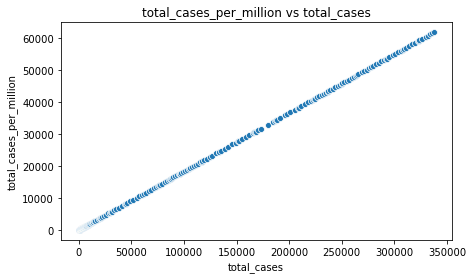

In [142]:
#total_cases                         
#total_cases_per_million
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['total_cases'], y=df_slovakia["total_cases_per_million"])
plt.title('total_cases_per_million vs total_cases')

fronm the above graphs both features are  identical so take one feature to predict the model

In [143]:
df_slovakia.drop(['new_cases_smoothed_per_million','new_cases_per_million','hosp_patients_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
                 'new_tests_per_thousand','new_tests_smoothed_per_thousand','total_tests_per_thousand','total_deaths_per_million','total_cases_per_million',
                 ],axis=1,inplace=True)

In [144]:
df_slovakia.shape

(374, 30)

In [145]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aged_65_older               374 non-null    float64
 1   aged_70_older               374 non-null    float64
 2   cardiovasc_death_rate       374 non-null    float64
 3   date                        374 non-null    int64  
 4   diabetes_prevalence         374 non-null    float64
 5   extreme_poverty             374 non-null    float64
 6   female_smokers              374 non-null    float64
 7   gdp_per_capita              374 non-null    float64
 8   hosp_patients               374 non-null    float64
 9   hospital_beds_per_thousand  374 non-null    float64
 10  human_development_index     374 non-null    float64
 11  life_expectancy             374 non-null    float64
 12  male_smokers                374 non-null    float64
 13  median_age                  3

# Bivariate analysis with target variable

Text(0.5, 1.0, 'New_cases vs aged_65_older')

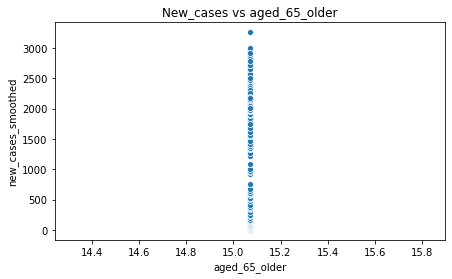

In [146]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['aged_65_older'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs aged_65_older')

from graph we see no relation between two features

Text(0.5, 1.0, 'New_cases vs cardiovasc_death_rate')

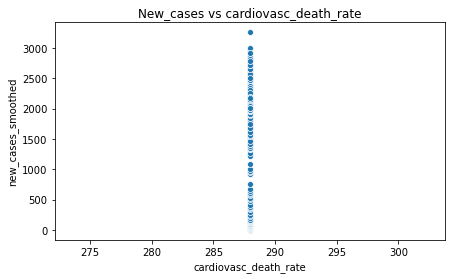

In [147]:
#cardiovasc_death_rate
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['cardiovasc_death_rate'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs cardiovasc_death_rate')

Text(0.5, 1.0, 'New_cases vs cardiovasc_death_rate')

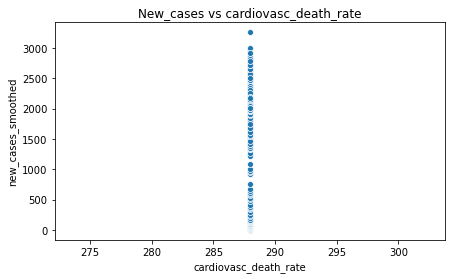

In [148]:
#cardiovasc_death_rate
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['cardiovasc_death_rate'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs cardiovasc_death_rate')

Text(0.5, 1.0, 'New_cases vs date')

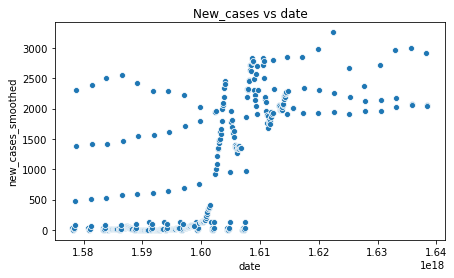

In [149]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['date'], y=df_slovakia['new_cases_smoothed'])
plt.title('New_cases vs date')

In [150]:
(df_slovakia['date']).corr(df_slovakia['new_cases_smoothed'])

0.705336486913678

both feature are correlated, use for prediction

In [151]:
(df_slovakia['new_cases']).corr(df_slovakia['new_cases_smoothed'])

0.8725859374196675

Text(0.5, 1.0, 'New_cases vs diabetes_prevalence')

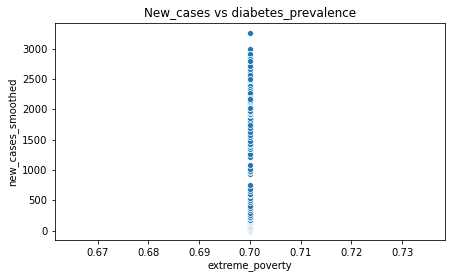

In [152]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['extreme_poverty'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs diabetes_prevalence')

no relation.drop diabetes_prevalence

Text(0.5, 1.0, 'New_cases vs hosp_patients')

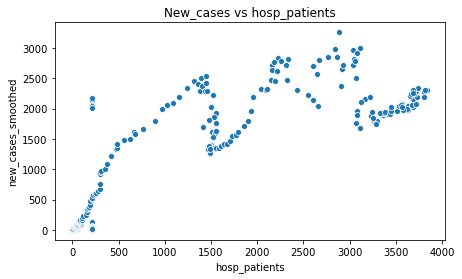

In [153]:
#hosp_patients
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['hosp_patients'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs hosp_patients')

Text(0.5, 1.0, 'New_cases vs hosp_patients')

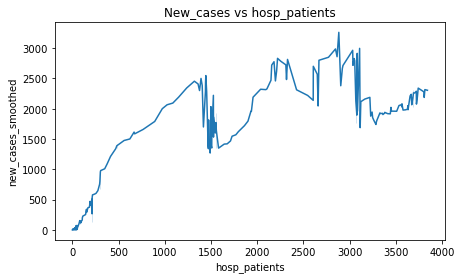

In [154]:
#hosp_patients
plt.figure(figsize=(7,4))
sns.lineplot(x=df_slovakia['hosp_patients'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs hosp_patients')

In [155]:
(df_slovakia['hosp_patients']).corr(df_slovakia['new_cases_smoothed'])

0.8593145448630025

Text(0.5, 1.0, 'new_cases_smoothed vs new_deaths')

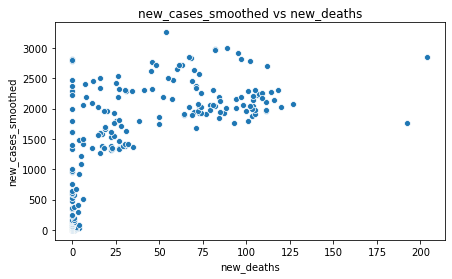

In [156]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_deaths'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_cases_smoothed vs new_deaths')

In [157]:
(df_slovakia['new_cases_smoothed']).corr(df_slovakia['new_deaths'])

0.7528493062807917

Text(0.5, 1.0, 'New_cases vs new_deaths')

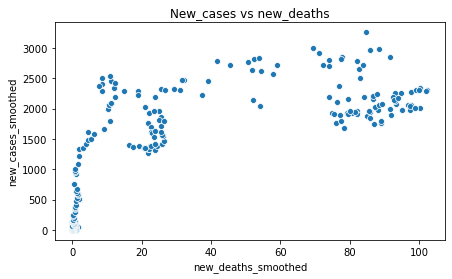

In [158]:
#new_deaths
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_deaths_smoothed'], y=df_slovakia["new_cases_smoothed"])
plt.title('New_cases vs new_deaths')

In [159]:
(df_slovakia['new_cases_smoothed']).corr(df_slovakia['new_deaths_smoothed'])

0.8054680661446664

Text(0.5, 1.0, 'new_cases_smoothed vs new_tests ')

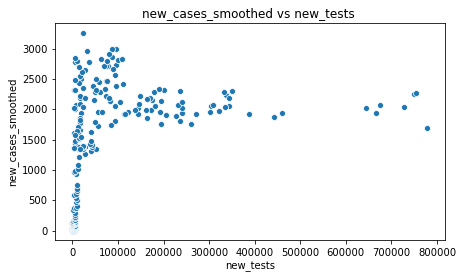

In [160]:
#new_tests
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_tests'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_cases_smoothed vs new_tests ')

In [161]:
(df_slovakia['new_tests']).corr(df_slovakia['new_cases_smoothed'])

0.4918448305389645

Text(0.5, 1.0, 'new_tests_smoothed vs new_deaths')

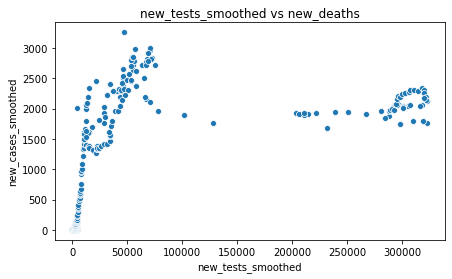

In [162]:
#new_tests_smoothed
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_tests_smoothed'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_tests_smoothed vs new_deaths')

In [163]:
(df_slovakia['positive_rate']).corr(df_slovakia['new_cases_smoothed'])

0.5682044667794577

In [164]:
(df_slovakia['population']).corr(df_slovakia['new_cases_smoothed'])
#no relation

nan

In [165]:
(df_slovakia['population_density']).corr(df_slovakia['new_cases_smoothed'])
# negative correlation

-5.0812048593317736e-17

In [166]:
#positive_rate
(df_slovakia['positive_rate']).corr(df_slovakia['new_cases_smoothed'])

0.5682044667794577

In [167]:
#stringency_index
(df_slovakia['stringency_index']).corr(df_slovakia['new_cases_smoothed'])
# correlation feature

0.4497758307345464

In [168]:
#tests_per_case
(df_slovakia['tests_per_case']).corr(df_slovakia['new_cases_smoothed'])
#negative correlation

-0.34118198938407857

In [169]:
#total_cases
(df_slovakia['total_cases']).corr(df_slovakia['new_cases_smoothed'])
#negative correlation

0.8313734167362042

In [170]:
#total_deaths
(df_slovakia['total_deaths']).corr(df_slovakia['new_cases_smoothed'])
#positive relation

0.6616370245833613

In [171]:
#total_tests 
(df_slovakia['total_tests']).corr(df_slovakia['new_cases_smoothed'])
# correlated 

0.5999629555221436

Text(0.5, 1.0, 'new_cases_smoothed vs extreme_poverty')

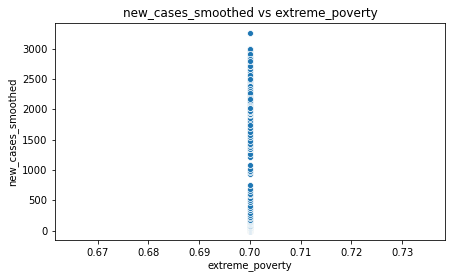

In [172]:
#extreme_poverty
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['extreme_poverty'], y=df_slovakia["new_cases_smoothed"])
plt.title('new_cases_smoothed vs extreme_poverty')

In [173]:
#tests performed
(df_slovakia['extreme_poverty']).corr(df_slovakia['new_cases_smoothed'])
#no relation

1.8101792311369445e-16

In [174]:
(df_slovakia['tests performed']).corr(df_slovakia['new_cases_smoothed'])

-0.057244344442064644

In [175]:
(df_slovakia['hospital_beds_per_thousand']).corr(df_slovakia['new_cases_smoothed'])

1.8101792311369445e-16

if a feature has no relation with target variable(new_cases_smoothed)  remove the feature and take the other feature to predict the model,select the features where corr score more than 60 for prediction.


In [176]:
#df_slovakia.drop(['aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence','extreme_poverty','female_smokers','gdp_per_capita','human_development_index','life_expectancy','male_smokers','median_age','population','population_density',
                # 'reproduction_rate','tests_per_case','tests performed','hospital_beds_per_thousand'],axis=1,inplace=True)

In [177]:
df_slovakia.drop(['aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence','extreme_poverty','female_smokers',
                  'gdp_per_capita','human_development_index','life_expectancy','male_smokers','median_age','population','population_density',
                 'reproduction_rate','tests_per_case','tests performed','hospital_beds_per_thousand',
                 'stringency_index',
                ],axis=1,inplace=True)

In [178]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 374 non-null    int64  
 1   hosp_patients        374 non-null    float64
 2   new_cases            374 non-null    float64
 3   new_cases_smoothed   374 non-null    float64
 4   new_deaths           374 non-null    float64
 5   new_deaths_smoothed  374 non-null    float64
 6   new_tests            374 non-null    float64
 7   new_tests_smoothed   374 non-null    float64
 8   positive_rate        374 non-null    float64
 9   total_cases          374 non-null    float64
 10  total_deaths         374 non-null    float64
 11  total_tests          374 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 38.0 KB


# # #correlation map

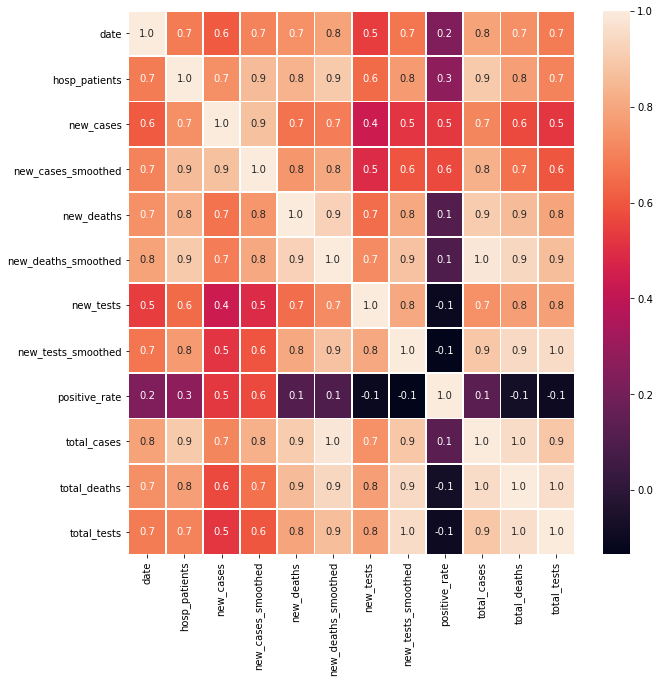

In [179]:
#correlation map
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_slovakia.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [180]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 374 non-null    int64  
 1   hosp_patients        374 non-null    float64
 2   new_cases            374 non-null    float64
 3   new_cases_smoothed   374 non-null    float64
 4   new_deaths           374 non-null    float64
 5   new_deaths_smoothed  374 non-null    float64
 6   new_tests            374 non-null    float64
 7   new_tests_smoothed   374 non-null    float64
 8   positive_rate        374 non-null    float64
 9   total_cases          374 non-null    float64
 10  total_deaths         374 non-null    float64
 11  total_tests          374 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 38.0 KB


In [181]:
df_slovakia.head()

,date,hosp_patients,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_tests,new_tests_smoothed,positive_rate,total_cases,total_deaths,total_tests
60393,1591142400000000000,213.5,1.0,131.143,0.5,0.714,378.0,3944.0,0.024,1.0,39.5,378.0
60394,1593734400000000000,213.5,0.0,131.143,0.5,0.714,66.0,3944.0,0.024,1.0,39.5,444.0
60395,1596412800000000000,213.5,2.0,131.143,0.5,0.714,76.0,3944.0,0.024,3.0,39.5,520.0
60396,1599091200000000000,213.5,0.0,131.143,0.5,0.714,69.0,3944.0,0.024,3.0,39.5,589.0
60397,1601683200000000000,213.5,4.0,131.143,0.5,0.714,111.0,3944.0,0.024,7.0,39.5,700.0


In [182]:
df_slovakia.describe()

,date,hosp_patients,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_tests,new_tests_smoothed,positive_rate,total_cases,total_deaths,total_tests
count,3.740000e+02,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02
mean,1.599849e+18,981.008021,902.414439,887.367465,22.836898,22.034773,53407.665775,50652.294118,0.045249,73280.117647,1203.673797,2.358314e+06
std,1.235181e+16,1278.005462,1176.685369,1022.355578,37.584099,34.076695,122014.486845,96298.066853,0.043925,103901.093482,2186.822792,4.374071e+06
min,1.578096e+18,0.000000,0.000000,0.857000,0.000000,0.000000,24.000000,82.000000,0.000000,1.000000,1.000000,3.780000e+02
25%,1.590300e+18,27.500000,14.000000,18.749750,0.000000,0.000000,1711.750000,1902.250000,0.014000,1528.500000,28.000000,1.897878e+05
50%,1.598962e+18,213.500000,117.500000,131.143000,0.500000,0.714000,4266.000000,3944.000000,0.024000,4807.500000,39.500000,3.659450e+05
75%,1.607623e+18,1702.000000,1843.750000,1944.321000,30.000000,26.071500,41389.750000,43884.250000,0.079000,126545.500000,1117.500000,2.027515e+06
max,1.638490e+18,3842.000000,6315.000000,3259.857000,204.000000,102.429000,778954.000000,323067.000000,0.178000,337503.000000,8528.000000,1.997020e+07


# Linear Regression model

In [183]:
#normalize data
df_slovakia=(df_slovakia)/df_slovakia.max()

In [184]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 374 non-null    float64
 1   hosp_patients        374 non-null    float64
 2   new_cases            374 non-null    float64
 3   new_cases_smoothed   374 non-null    float64
 4   new_deaths           374 non-null    float64
 5   new_deaths_smoothed  374 non-null    float64
 6   new_tests            374 non-null    float64
 7   new_tests_smoothed   374 non-null    float64
 8   positive_rate        374 non-null    float64
 9   total_cases          374 non-null    float64
 10  total_deaths         374 non-null    float64
 11  total_tests          374 non-null    float64
dtypes: float64(12)
memory usage: 38.0 KB


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y_data = df_slovakia['new_cases']
#x_data = df_slovakia[['date','hosp_patients','new_cases_smoothed','new_deaths_smoothed',
 
#'total_cases','total_deaths']]
x_data = df_slovakia[['date','new_deaths_smoothed','new_cases_smoothed',
                      'new_tests','positive_rate','total_cases','total_deaths','total_tests']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
x_data.head(5)

number of test samples : 75
number of training samples: 299


,date,new_deaths_smoothed,new_cases_smoothed,new_tests,positive_rate,total_cases,total_deaths,total_tests
60393,0.971103,0.006971,0.04023,0.000485,0.134831,0.000003,0.004632,0.000019
60394,0.972685,0.006971,0.04023,0.000085,0.134831,0.000003,0.004632,0.000022
60395,0.974320,0.006971,0.04023,0.000098,0.134831,0.000009,0.004632,0.000026
60396,0.975954,0.006971,0.04023,0.000089,0.134831,0.000009,0.004632,0.000029
60397,0.977536,0.006971,0.04023,0.000142,0.134831,0.000021,0.004632,0.000035


In [186]:
lm = LinearRegression()
lm.fit(x_train, y_train)
Y_hat=lm.predict(x_test)

In [187]:
print ('Coefficients: ', lm.coef_)
print ('Intercept: ' , lm.intercept_)
print('Train score :',lm.score(x_train, y_train))
print('Test score :', lm.score(x_test, y_test) )

Coefficients:  [-0.48248503  0.00740493  0.52881212  0.04067696  0.04164619 -0.06547068
 -0.0175973   0.06238603]
Intercept:  0.4646672876006641
Train score : 0.775829757447884
Test score : 0.7169669829412744


In [188]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_hat)
#print('Mean Square error:')

0.009896724013174351

In [189]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_hat)
#print('Mean Square error:')

0.009896724013174351

In [190]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,Y_hat)

0.05032559324588101

In [191]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_hat)

0.7169669829412744

# Evaluate the model using K-fold cross validation for the original country.

In [192]:
#K-Fold CV

In [193]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores 

array([0.62806306, 0.77767957, 0.69466806, 0.83467298, 0.72074662])

In [194]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
scores   
 

array([0.88327122, 0.49720068, 0.73549276, 0.63151503, 0.83923505])

In [195]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.01121636, -0.00923844, -0.01155356, -0.00556945, -0.00784506])

In [196]:
break

SyntaxError: 'break' outside loop (<ipython-input-196-6aaf1f276005>, line 1)

# Evaluate the model using K-fold cross validation on the other country.

In [ ]:
#Evaluate the model using K-fold cross validation on the other country.

In [ ]:
#Germany

In [ ]:
df_newzealand=df[(df['location']=='New Zealand')]

In [ ]:
df_newzealand.shape

In [ ]:
df_newzealand.info()

In [ ]:

# before filling up the missing value ,check the skewness of data
df_germany.skew(axis = 0, skipna = True)

In [ ]:
df_germany.drop(['handwashing_facilities','icu_patients','icu_patients_per_million','new_vaccinations','new_vaccinations_smoothed',
                  'location','iso_code','continent','location','new_vaccinations_smoothed_per_million','people_fully_vaccinated','people_fully_vaccinated_per_hundred',
                    'people_vaccinated','people_vaccinated_per_hundred','weekly_icu_admissions_per_million','weekly_icu_admissions','weekly_hosp_admissions_per_million',
                  'weekly_hosp_admissions','total_vaccinations','total_vaccinations_per_hundred','continent','iso_code'],axis=1, inplace=True)

In [ ]:
df_germany.info()

In [ ]:
df_germany.isnull().sum()

In [ ]:
#drop  column having lot of missing value
df_germany.drop(['hosp_patients','hosp_patients_per_million','new_tests','hosp_patients_per_million','new_tests','total_tests',
                 'total_tests_per_thousand','new_tests_per_thousand','positive_rate','tests_per_case','extreme_poverty','tests_units'],axis=1, inplace=True)

In [ ]:
df_germany.info()

In [ ]:
df_germany.isnull().sum()

In [ ]:
df_germany = df_germany.fillna(df_germany.median())

In [ ]:
df_germany.isnull().sum()

In [ ]:
x_test=df_germany

In [ ]:
#converting string date to date-time
df_germany['date'] = pd.to_datetime(df_germany['date']) 


In [ ]:
#date-time fromat to numeric dqta type
df_germany['date'] = pd.to_numeric(df_germany['date'])

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
x_test=df_germany
Y_hat=lm.predict(df_germany)

In [ ]:
print ('Coefficients: ', lm.coef_)
print ('Intercept: ' , lm.intercept_)
print('Train score :',lm.score(x_train, y_train))
print('Test score :', lm.score(x_test, y_test) )

In [ ]:
# SER Model 

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#no of population
N=df_slovakia['population'][0]
#reproduction rate=beta

#expected amount of people  an infected person infect perday(transmission rate constant)
beta=df_slovakia['reproduction_rate'].mean()
#removal rate
gamma= 1/D
#D= no of days an infected person has and can spread the disease
D= 14